In [29]:
import os
import zipfile

from scipy.io import loadmat
import numpy as np

In [49]:
zip_dir = '../../data/Ninapro_original/DB2'
zip_path = '../../data/Ninapro_original/DB2/DB2_s2.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(zip_dir)
print(f'Extracted {zip_path} to {zip_dir}')

Extracted ../../data/Ninapro_original/DB2/DB2_s2.zip to ../../data/Ninapro_original/DB2


In [25]:
test_dir = zip_path.replace('.zip', '')

file_list = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]
sample_file = os.path.join(test_dir, file_list[2])
print(f'Sample file: {sample_file}')

Sample file: ../../data/Ninapro_original/DB2/DB2_s1/S1_E1_A1.mat


In [30]:
# load the sample mat file
sample_data = loadmat(sample_file)
print(f'Sample data keys: {sample_data.keys()}')

Sample data keys: dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])


In [31]:
sample_data['emg'].shape

(1808331, 12)

In [27]:
np.unique(sample_data['restimulus'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int8)

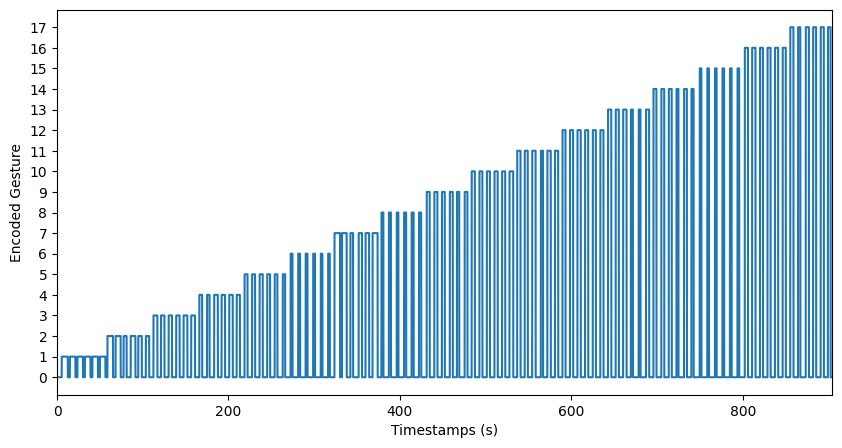

In [57]:
import matplotlib.pyplot as plt

timestamp = np.arange(sample_data['restimulus'].shape[0]) / 2000

plt.figure(figsize=(10, 5))
plt.plot(timestamp, sample_data['restimulus'])
plt.xlim(0, timestamp[-1])

plt.yticks(np.unique(sample_data['restimulus']))
plt.xlabel('Timestamps (s)')
plt.ylabel('Encoded Gesture')
plt.show()

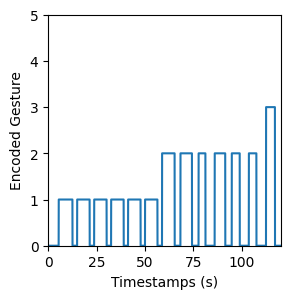

In [63]:
timestamp = np.arange(sample_data['restimulus'].shape[0]) / 2000

plt.figure(figsize=(3, 3))
plt.plot(timestamp, sample_data['restimulus'])
plt.xlim(0, 120)
plt.ylim(0, 5)

# plt.yticks(np.unique(sample_data['restimulus']))
plt.xlabel('Timestamps (s)')
plt.ylabel('Encoded Gesture')
plt.show()

In [34]:
restimulus = sample_data['restimulus'].flatten()
emg = sample_data['emg']

non_zero_indices = np.where(restimulus != 0)[0]

# Find contiguous blocks of non-zero indices
if non_zero_indices.size > 0:
    splits = np.where(np.diff(non_zero_indices) > 1)[0] + 1
    contiguous_blocks = np.split(non_zero_indices, splits)
else:
    contiguous_blocks = []

emg_sections = [emg[block] for block in contiguous_blocks if block.size > 0]
labels = [restimulus[block[0]] for block in contiguous_blocks if block.size > 0]

for i, (section, label) in enumerate(zip(emg_sections, labels)):
    print(f'Section {i+1} shape: {section.shape}, Label: {label}')

Section 1 shape: (14221, 12), Label: 1
Section 2 shape: (12924, 12), Label: 1
Section 3 shape: (12852, 12), Label: 1
Section 4 shape: (12965, 12), Label: 1
Section 5 shape: (12910, 12), Label: 1
Section 6 shape: (12829, 12), Label: 1
Section 7 shape: (13003, 12), Label: 2
Section 8 shape: (11905, 12), Label: 2
Section 9 shape: (7089, 12), Label: 2
Section 10 shape: (10912, 12), Label: 2
Section 11 shape: (8245, 12), Label: 2
Section 12 shape: (7825, 12), Label: 2
Section 13 shape: (9205, 12), Label: 3
Section 14 shape: (8069, 12), Label: 3
Section 15 shape: (7884, 12), Label: 3
Section 16 shape: (8046, 12), Label: 3
Section 17 shape: (8910, 12), Label: 3
Section 18 shape: (8871, 12), Label: 3
Section 19 shape: (6671, 12), Label: 4
Section 20 shape: (5924, 12), Label: 4
Section 21 shape: (8587, 12), Label: 4
Section 22 shape: (8062, 12), Label: 4
Section 23 shape: (8249, 12), Label: 4
Section 24 shape: (7572, 12), Label: 4
Section 25 shape: (7026, 12), Label: 5
Section 26 shape: (7029, 

 Original shape (14221, 12), Resampled shape (8192, 12)
 Original shape (12924, 12), Resampled shape (8192, 12)
 Original shape (12852, 12), Resampled shape (8192, 12)
 Original shape (12965, 12), Resampled shape (8192, 12)
 Original shape (12910, 12), Resampled shape (8192, 12)


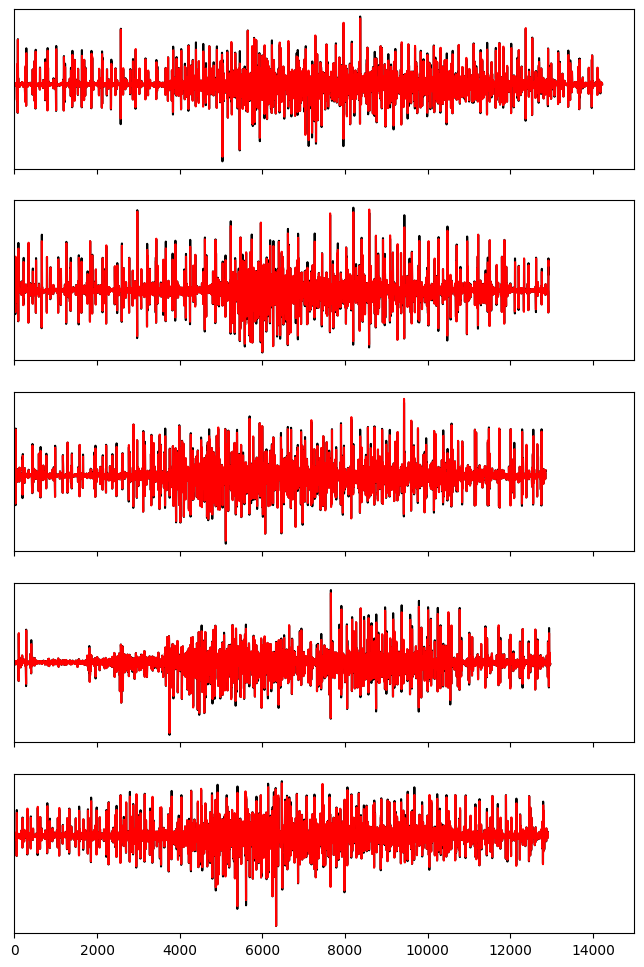

In [68]:
from scipy.signal import resample
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(8, 12), nrows=5, ncols=1, sharex=True)

for ax, section in zip(axes, emg_sections[:5]):
    
    timestamp = np.arange(section.shape[0])
    resampled_data, resampled_timestamp = resample(section, t=timestamp, num=8192)
    
    ax.plot(timestamp, section[:, 0], 'k')
    ax.plot(resampled_timestamp, resampled_data[:, 0], 'r')
    
    print(f" Original shape {section.shape}, Resampled shape {resampled_data.shape}")
    ax.set_yticks([])
    
plt.xlim(0, 15000)
plt.show()

 Original shape (14221, 12), Resampled shape (8192, 12)
 Original shape (12924, 12), Resampled shape (8192, 12)
 Original shape (12852, 12), Resampled shape (8192, 12)
 Original shape (12965, 12), Resampled shape (8192, 12)
 Original shape (12910, 12), Resampled shape (8192, 12)


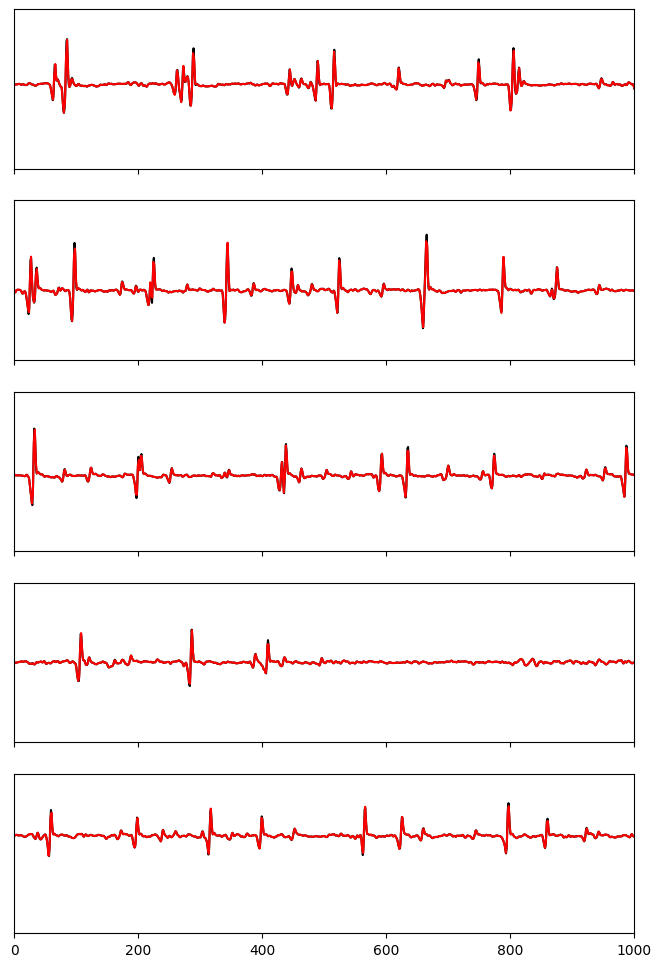

In [67]:
from scipy.signal import resample
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(8, 12), nrows=5, ncols=1, sharex=True)

for ax, section in zip(axes, emg_sections[:5]):
    
    timestamp = np.arange(section.shape[0])
    resampled_data, resampled_timestamp = resample(section, t=timestamp, num=8192)
    
    ax.plot(timestamp, section[:, 0], 'k')
    ax.plot(resampled_timestamp, resampled_data[:, 0], 'r')
    
    print(f" Original shape {section.shape}, Resampled shape {resampled_data.shape}")
    ax.set_yticks([])
    
plt.xlim(0, 1000)
plt.show()